### Building a Linear Classifier Using SVMs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import utilities 

In [3]:
# Load input data
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter03/data_multivar.txt'
X, y = utilities.load_data(input_file)

# Separate the data into classes based on 'y'
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

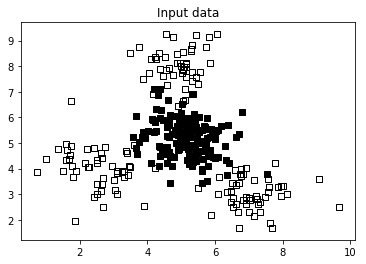

In [4]:
# Plot the input data
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], facecolors='black', edgecolors='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], facecolors='None', edgecolors='black', marker='s')
plt.title('Input data')
plt.show()

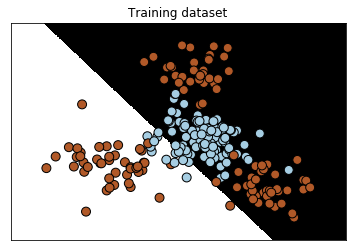

In [5]:
# Train test split and SVM training
from sklearn import model_selection
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)

params = {'kernel': 'linear'}
#params = {'kernel': 'poly', 'degree': 3}
# params = {'kernel': 'rbf'}
classifier = SVC(**params, gamma='auto')
classifier.fit(X_train, y_train)
utilities.plot_classifier(classifier, X_train, y_train, 'Training dataset')
plt.show()

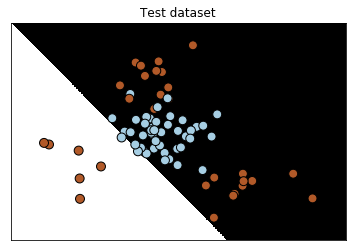

In [6]:
y_test_pred = classifier.predict(X_test)
utilities.plot_classifier(classifier, X_test, y_test, 'Test dataset')

In [9]:
# Evaluate classifier performance

from sklearn.metrics import classification_report

target_names = ['Class-' + str(int(i)) for i in set(y)]
print("\n" + "#"*30)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=target_names))
print("#"*30 + "\n")

print("#"*30)
print("\nClassification report on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=target_names))
print("#"*30 + "\n")


##############################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.55      0.88      0.68       105
     Class-1       0.78      0.38      0.51       120

   micro avg       0.61      0.61      0.61       225
   macro avg       0.66      0.63      0.59       225
weighted avg       0.67      0.61      0.59       225

##############################

##############################

Classification report on test dataset

              precision    recall  f1-score   support

     Class-0       0.64      0.96      0.77        45
     Class-1       0.75      0.20      0.32        30

   micro avg       0.65      0.65      0.65        75
   macro avg       0.70      0.58      0.54        75
weighted avg       0.69      0.65      0.59        75

##############################



### Tackling Class Imbalance

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

import utilities 

In [12]:
# Load input data
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter03/data_multivar_imbalance.txt'
X, y = utilities.load_data(input_file)

# Separate the data into classes based on 'y'
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

Text(0.5, 1.0, 'Input data')

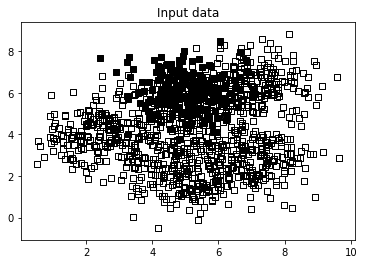

In [15]:
# Plot the input data
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], facecolors='black', edgecolors='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], facecolors='None', edgecolors='black', marker='s')
plt.title('Input data')

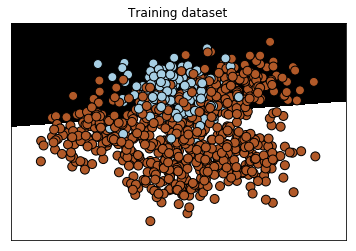

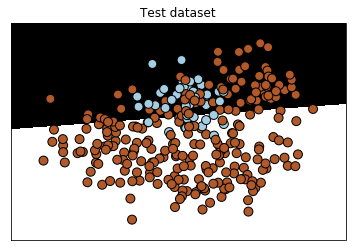

In [21]:
# Train test split
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)

# params = {'kernel': 'linear'}
params = {'kernel': 'linear', 'class_weight': 'balanced'}
classifier = SVC(**params)
classifier.fit(X_train, y_train)
utilities.plot_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test)
utilities.plot_classifier(classifier, X_test, y_test, 'Test dataset')

In [22]:
# Evaluate classifier performance

from sklearn.metrics import classification_report

target_names = ['Class-' + str(int(i)) for i in set(y)]
print("\n" + "#"*30)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=target_names))
print("#"*30 + "\n")

print("#"*30)
print("\nClassification report on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=target_names))
print("#"*30 + "\n")


##############################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.39      0.91      0.54       158
     Class-1       0.97      0.69      0.81       742

   micro avg       0.73      0.73      0.73       900
   macro avg       0.68      0.80      0.68       900
weighted avg       0.87      0.73      0.76       900

##############################

##############################

Classification report on test dataset

              precision    recall  f1-score   support

     Class-0       0.29      0.76      0.42        42
     Class-1       0.95      0.70      0.80       258

   micro avg       0.71      0.71      0.71       300
   macro avg       0.62      0.73      0.61       300
weighted avg       0.86      0.71      0.75       300

##############################



### Extracting Confidence Measurements

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

import utilities 

In [24]:
# Load input data
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter03/data_multivar.txt'
X, y = utilities.load_data(input_file)

# Train test split
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)

params = {'kernel': 'rbf'}
classifier = SVC(**params)
classifier.fit(X_train, y_train)

/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
# Measure distance from the boundary

input_datapoints = np.array([[2, 1.5], [8, 9], [4.8, 5.2], [4, 4], [2.5, 7], [7.6, 2], [5.4, 5.9]])
print("Distance from the boundary:")
for i in input_datapoints:
    print(i, '-->', classifier.decision_function([i])[0])

Distance from the boundary:
[2.  1.5] --> 0.9248968828198472
[8. 9.] --> 0.6422390024622062
[4.8 5.2] --> -2.035417667930382
[4. 4.] --> -0.07623172174998727
[2.5 7. ] --> 0.7345593292517577
[7.6 2. ] --> 1.0982437814537895
[5.4 5.9] --> -1.2114549553124778


In [26]:
# Confidence measure

params = {'kernel': 'rbf', 'probability': True}
classifier = SVC(**params)
classifier.fit(X_train,y_train)
    
print("Confidence measure:")
for i in input_datapoints:
    print(i, '-->', classifier.predict_proba([i])[0])

Confidence measure:
[2.  1.5] --> [0.06467386 0.93532614]
[8. 9.] --> [0.13267375 0.86732625]
[4.8 5.2] --> [0.99645631 0.00354369]
[4. 4.] --> [0.5352224 0.4647776]
[2.5 7. ] --> [0.10553417 0.89446583]
[7.6 2. ] --> [0.04078983 0.95921017]
[5.4 5.9] --> [0.96437763 0.03562237]


/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


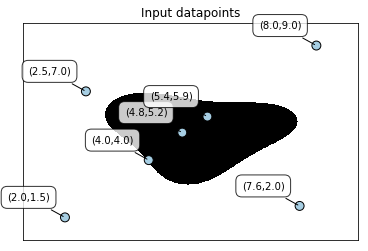

In [27]:
utilities.plot_classifier(classifier, input_datapoints, [0]*len(input_datapoints), 'Input datapoints', 'True')
plt.show()

### Finding Optimal Hyperparameters

In [28]:
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd
import utilities 

In [30]:
# Load input data
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter03/data_multivar.txt'
X, y = utilities.load_data(input_file)

# Train test split

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)

In [41]:
# Set the parameters by cross-validation
parameter_grid = {"C": [1, 10, 50, 600],
                  'kernel':['linear','poly','rbf'],
                  "gamma": [0.01, 0.001],
                  'degree': [2, 3]}

metrics = ['precision']

for metric in metrics:

    print("#### Grid Searching optimal hyperparameters for", metric)
          
    classifier = GridSearchCV(svm.SVC(C=1), 
            parameter_grid, cv=5,scoring=metric,return_train_score=True) 

    classifier.fit(X_train, y_train)

    print("Scores across the parameter grid:")
    GridSCVResults = pd.DataFrame(classifier.cv_results_)
    for i in range(0,len(GridSCVResults)):
        print(GridSCVResults.params[i], '-->', round(GridSCVResults.mean_test_score[i],3))
    
    print("Highest scoring parameter set:", classifier.best_params_)
    y_true, y_pred = y_test, classifier.predict(X_test)
    print("\nFull performance report:\n")
    print(classification_report(y_true, y_pred))

#### Grid Searching optimal hyperparameters for precision
Scores across the parameter grid:
{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'} --> 0.676
{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'} --> 0.527
{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'} --> 0.98
{'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'} --> 0.676
{'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'} --> 0.533
{'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'} --> 0.533
{'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'linear'} --> 0.676
{'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'} --> 0.531
{'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'} --> 0.98
{'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'linear'} --> 0.676
{'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'} --> 0.533
{'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'} --> 0.533
{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'} --> 0.676
{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'pol

In [40]:
# Perform a randomized search on hyper parameters

from sklearn.model_selection import RandomizedSearchCV
    
parameter_rand = {"C": [1, 10, 50, 600],
                  'kernel':['linear','poly','rbf'],
                  "gamma": [0.01, 0.001],
                  'degree': [2, 3]}

metrics = ['precision']

for metric in metrics:

    print("#### Randomized Searching optimal hyperparameters for", metric)
          
    classifier = RandomizedSearchCV(svm.SVC(C=1), 
            param_distributions=parameter_rand,n_iter=30, cv=5,return_train_score=True)

    classifier.fit(X_train, y_train)

    print("Scores across the parameter grid:")
    RandSCVResults = pd.DataFrame(classifier.cv_results_)
    for i in range(0,len(RandSCVResults)):
        print(RandSCVResults.params[i], '-->', round(RandSCVResults.mean_test_score[i],3))
    
    print("Highest scoring parameter set:", classifier.best_params_)
    y_true, y_pred = y_test, classifier.predict(X_test)
    print("\nFull performance report:\n")
    print(classification_report(y_true, y_pred))

#### Randomized Searching optimal hyperparameters for precision
Scores across the parameter grid:
{'kernel': 'rbf', 'gamma': 0.01, 'degree': 3, 'C': 1} --> 0.831
{'kernel': 'rbf', 'gamma': 0.01, 'degree': 3, 'C': 50} --> 0.947
{'kernel': 'poly', 'gamma': 0.001, 'degree': 3, 'C': 10} --> 0.533
{'kernel': 'linear', 'gamma': 0.001, 'degree': 2, 'C': 600} --> 0.591
{'kernel': 'rbf', 'gamma': 0.01, 'degree': 2, 'C': 600} --> 0.951
{'kernel': 'linear', 'gamma': 0.01, 'degree': 2, 'C': 50} --> 0.591
{'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'C': 50} --> 0.853
{'kernel': 'rbf', 'gamma': 0.001, 'degree': 2, 'C': 1} --> 0.533
{'kernel': 'linear', 'gamma': 0.01, 'degree': 2, 'C': 1} --> 0.591
{'kernel': 'rbf', 'gamma': 0.01, 'degree': 3, 'C': 10} --> 0.92
{'kernel': 'poly', 'gamma': 0.001, 'degree': 3, 'C': 600} --> 0.533
{'kernel': 'rbf', 'gamma': 0.001, 'degree': 3, 'C': 10} --> 0.524
{'kernel': 'rbf', 'gamma': 0.01, 'degree': 3, 'C': 600} --> 0.951
{'kernel': 'rbf', 'gamma': 0.001, 'degre

### Building an Event Predictor

In [42]:
# SVM classifier to detect different types of events

import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC

In [43]:
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter03/building_event_binary.txt'
#input_file = 'building_event_multiclass.txt'

# Reading the data
X = []
count = 0
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = line[:-1].split(',')
        X.append([data[0]] + data[2:])

X = np.array(X)

In [45]:
# Convert string data to numerical data
label_encoder = [] 
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [49]:
# Build SVM
params = {'kernel': 'rbf', 'probability': True, 'class_weight': 'balanced'} 
classifier = SVC(**params)
classifier.fit(X, y)

/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
# Cross validation
from sklearn import model_selection

accuracy = model_selection.cross_val_score(classifier, 
        X, y, scoring='accuracy', cv=3)
print("Accuracy of the classifier: " + str(round(100*accuracy.mean(), 2)) + "%")

/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of the classifier: 93.95%


In [53]:
# Testing encoding on single data instance
input_data = ['Tuesday', '12:30:00','21','23']
input_data_encoded = [-1] * len(input_data)
count = 0

for i,item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]]))
        count = count + 1 

input_data_encoded = np.array(input_data_encoded)

# Predict and print(output for a particular datapoint
output_class = classifier.predict([input_data_encoded])
print("Output class:", label_encoder[-1].inverse_transform(output_class)[0])

Output class: noevent


### Estimating Traffic

In [54]:
# SVM regressor to estimate traffic

import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVR

In [56]:
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter03/traffic_data.txt'

# Reading the data
X = []
count = 0
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = line[:-1].split(',')
        X.append(data)

X = np.array(X)

In [57]:
# Convert string data to numerical data
label_encoder = [] 
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [58]:
# Build SVR
params = {'kernel': 'rbf', 'C': 10.0, 'epsilon': 0.2} 
regressor = SVR(**params)
regressor.fit(X, y)

/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
# Cross validation
from sklearn import model_selection

explained_variance = model_selection.cross_val_score(regressor, 
        X, y, scoring='explained_variance', cv=3)
print("Explained variance score = " + str(round(100*explained_variance.mean(), 2)) + "%")

/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Explained variance score = 43.53%


In [75]:
# Testing encoding on single data instance
input_data = ['Tuesday', '13:35', 'San Francisco', 'yes']
input_data_encoded = [-1] * len(input_data)
count = 0
for i,item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]]))
        count = count + 1 

input_data_encoded = np.array(input_data_encoded)

# Predict and print output for a particular datapoint
print("Predicted traffic:", int(regressor.predict([input_data_encoded])[0]))

Predicted traffic: 29


### Simplifying Machine Learning Workflow Using TensorFlow

In [84]:
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf

In [85]:
# Load Iris data
iris = datasets.load_iris()
# Load features and classes
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, 
                                                                    iris.target, 
                                                                    test_size=0.3, 
                                                                    random_state=42)

In [86]:
# ------------------------------------------
# TensorFlow Implementation
# ------------------------------------------
# Building a 3-layer DNN with 50 units each.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(x_train)
classifier_tf = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, 
                                               hidden_units=[50, 50, 50], 
                                               n_classes=3)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5502efa550>, '_master': '',

In [87]:
classifier_tf.fit(x_train, y_train, steps=5000)
predictions = list(classifier_tf.predict(x_test, as_iterable=True))
score = metrics.accuracy_score(y_test, predictions)

print('TensorFlow Accuracy: {0:f}'.format(score))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to the Estimator interface.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:C

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmphh2_rkmu/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
TensorFlow Accuracy: 1.000000


### Implementing a Stacking Method

In [1]:
# load boston dataset from sklearn
from heamy.dataset import Dataset
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
data = load_boston()
X, y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [6]:
# create dataset
Data = Dataset(X_train,y_train,X_test)

In [7]:
# initialize RandomForest & LinearRegression
RfModel = Regressor(dataset=Data, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')
LRModel = Regressor(dataset=Data, estimator=LinearRegression, parameters={'normalize': True},name='lr')

In [8]:
# Stack two models
# Returns new dataset with out-of-fold predictions
Pipeline = ModelsPipeline(RfModel,LRModel)
StackModel = Pipeline.stack(k=10,seed=2)

In [9]:
# Train LinearRegression on stacked data (second stage)
Stacker = Regressor(dataset=StackModel, estimator=LinearRegression)
Results = Stacker.predict()

In [10]:
# Validate results using 10 fold cross-validation
Results = Stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [2.4689982292648174, 2.0355262476952496, 2.650054333262035, 3.305445306402163, 1.6454745090916632, 2.066802272251526, 2.2270721910613407, 2.24230849640811, 2.401696865339827, 1.7421259943403344]
Mean accuracy: 2.2785504445117066
Standard Deviation: 0.4517036047274647
Variance: 0.20403614652378566
